[13:52:10] Molecule does not have explicit Hs. Consider calling AddHs()
1000it [01:59,  8.37it/s]


[<rdkit.Chem.rdchem.Mol object at 0x1534b0190>, <rdkit.Chem.rdchem.Mol object at 0x1534b00b0>]


[13:54:10] Initializing MetalDisconnector
[13:54:10] Running MetalDisconnector
[13:54:10] Initializing Normalizer
[13:54:10] Running Normalizer
[13:54:10] Running LargestFragmentChooser
[13:54:10] Running Normalizer
[13:54:10] Running Uncharger
[13:54:10] Initializing MetalDisconnector
[13:54:10] Running MetalDisconnector
[13:54:10] Initializing Normalizer
[13:54:10] Running Normalizer
[13:54:10] Running LargestFragmentChooser
[13:54:10] Running Normalizer
[13:54:10] Running Uncharger


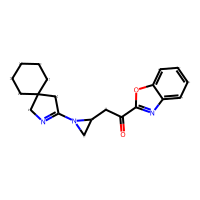

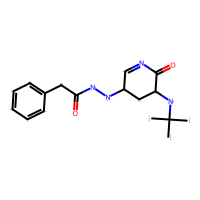

[{'mol_block': '\n     RDKit          3D\n\n 25 29  0  0  0  0  0  0  0  0999 V2000\n    0.2449    1.1597    2.0351 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0835    1.4695    0.8933 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.7334    0.4735    0.0668 C   0  0  0  0  0  2  0  0  0  0  0  0\n    0.0946   -0.0786   -0.9333 C   0  0  0  0  0  3  0  0  0  0  0  0\n    1.2400   -0.7678   -0.4036 C   0  0  0  0  0  2  0  0  0  0  0  0\n    0.3091   -1.3648   -1.2932 N   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.5187   -2.3485   -0.9381 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.1259   -3.3913   -0.0432 C   0  0  0  0  0  2  0  0  0  0  0  0\n   -1.2888   -4.2083    0.2388 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0280   -3.7125    1.4140 C   0  0  0  0  0  2  0  0  0  0  0  0\n   -2.3747   -4.3672    2.7067 C   0  0  0  0  0  2  0  0  0  0  0  0\n   -1.2998   -5.4085    2.9891 C   0  0  0  0  0  2  0  0  0  0  0  0\n   -0.7037   -6.2671    1.8624 C   0  0  0  0  0  2  0  0  0  0

In [5]:
from ml_conformer_generator import MLConformerGenerator
from cheminformatics import evaluate_samples
from rdkit import Chem
from rdkit.Chem import rdDistGeom

from rdkit.Chem import Draw


device = "cpu"
generator = MLConformerGenerator(device=device)


ref_mol = Chem.MolFromSmiles("CCc1noc(C)c1C(=O)NNC(=O)COc1ccccc1C")
rdDistGeom.EmbedMolecule(ref_mol, forceTol=0.001, randomSeed=12)

samples = generator.generate_conformers(reference_conformer=ref_mol, n_samples=2)
print(samples)

for sample in samples:
    smi = Chem.MolFromSmiles(Chem.MolToSmiles(sample))
    img = Draw.MolToImage(smi, size=(200, 200))
    display(img)
    
_, std_samples = evaluate_samples(ref_mol, samples)

print(std_samples)
